In [ ]:
import math
import random

import pandas as pd
from pysorteddict import SortedDict


def setup(sorted_dict_len: int, seed: float = math.pi) -> SortedDict:
    random.seed(seed)
    d = SortedDict()
    for _ in range(sorted_dict_len):
        d[random.random()] = random.random()
    return d


sorted_dict_lens = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]

In [62]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.style.use("light.mplstyle")


def plot(df: pd.DataFrame, logx: bool = True, logy: bool = False, title: str = ""):
    fig, ax = plt.subplots()
    df.plot(
        ax=ax,
        logx=logx,
        logy=logy,
        xlabel="Sorted Dictionary Length",
        xlim=(sorted_dict_lens[0] // 10, sorted_dict_lens[-1] * 10),
        ylabel="Average Execution Time, s",
    )
    ax.grid(which='major', linewidth=0.5, linestyle=':')
    ax.grid(which='minor', linewidth=0.0625, linestyle='-')
    ax.minorticks_on()
    ax.legend(prop={"family": "JetBrains Mono"})
    ax.set_title(title, fontname="JetBrains Mono")
    plt.show()

# `__contains__`

In [ ]:
df = pd.DataFrame(index=sorted_dict_lens, columns=["0.00 in d", "0.33 in d", "0.66 in d", "1.00 in d"])
for i, sorted_dict_len in enumerate(sorted_dict_lens):
    print(f"{sorted_dict_len=}")
    d = setup(sorted_dict_len)
    for j, key in enumerate([0.00, 0.33, 0.66, 1.00]):
        bench = %timeit -o key in d
        df.iat[i, j] = bench.average

In [ ]:
plot(df, "__contains__")

# `__iter__`

In [ ]:
df = pd.DataFrame(index=sorted_dict_lens, columns=["for _ in d: pass"])
for i, sorted_dict_len in enumerate(sorted_dict_lens):
    d = setup(sorted_dict_len)
    %timeit -v bench for _ in d: pass
    df.iloc[i] = bench.average

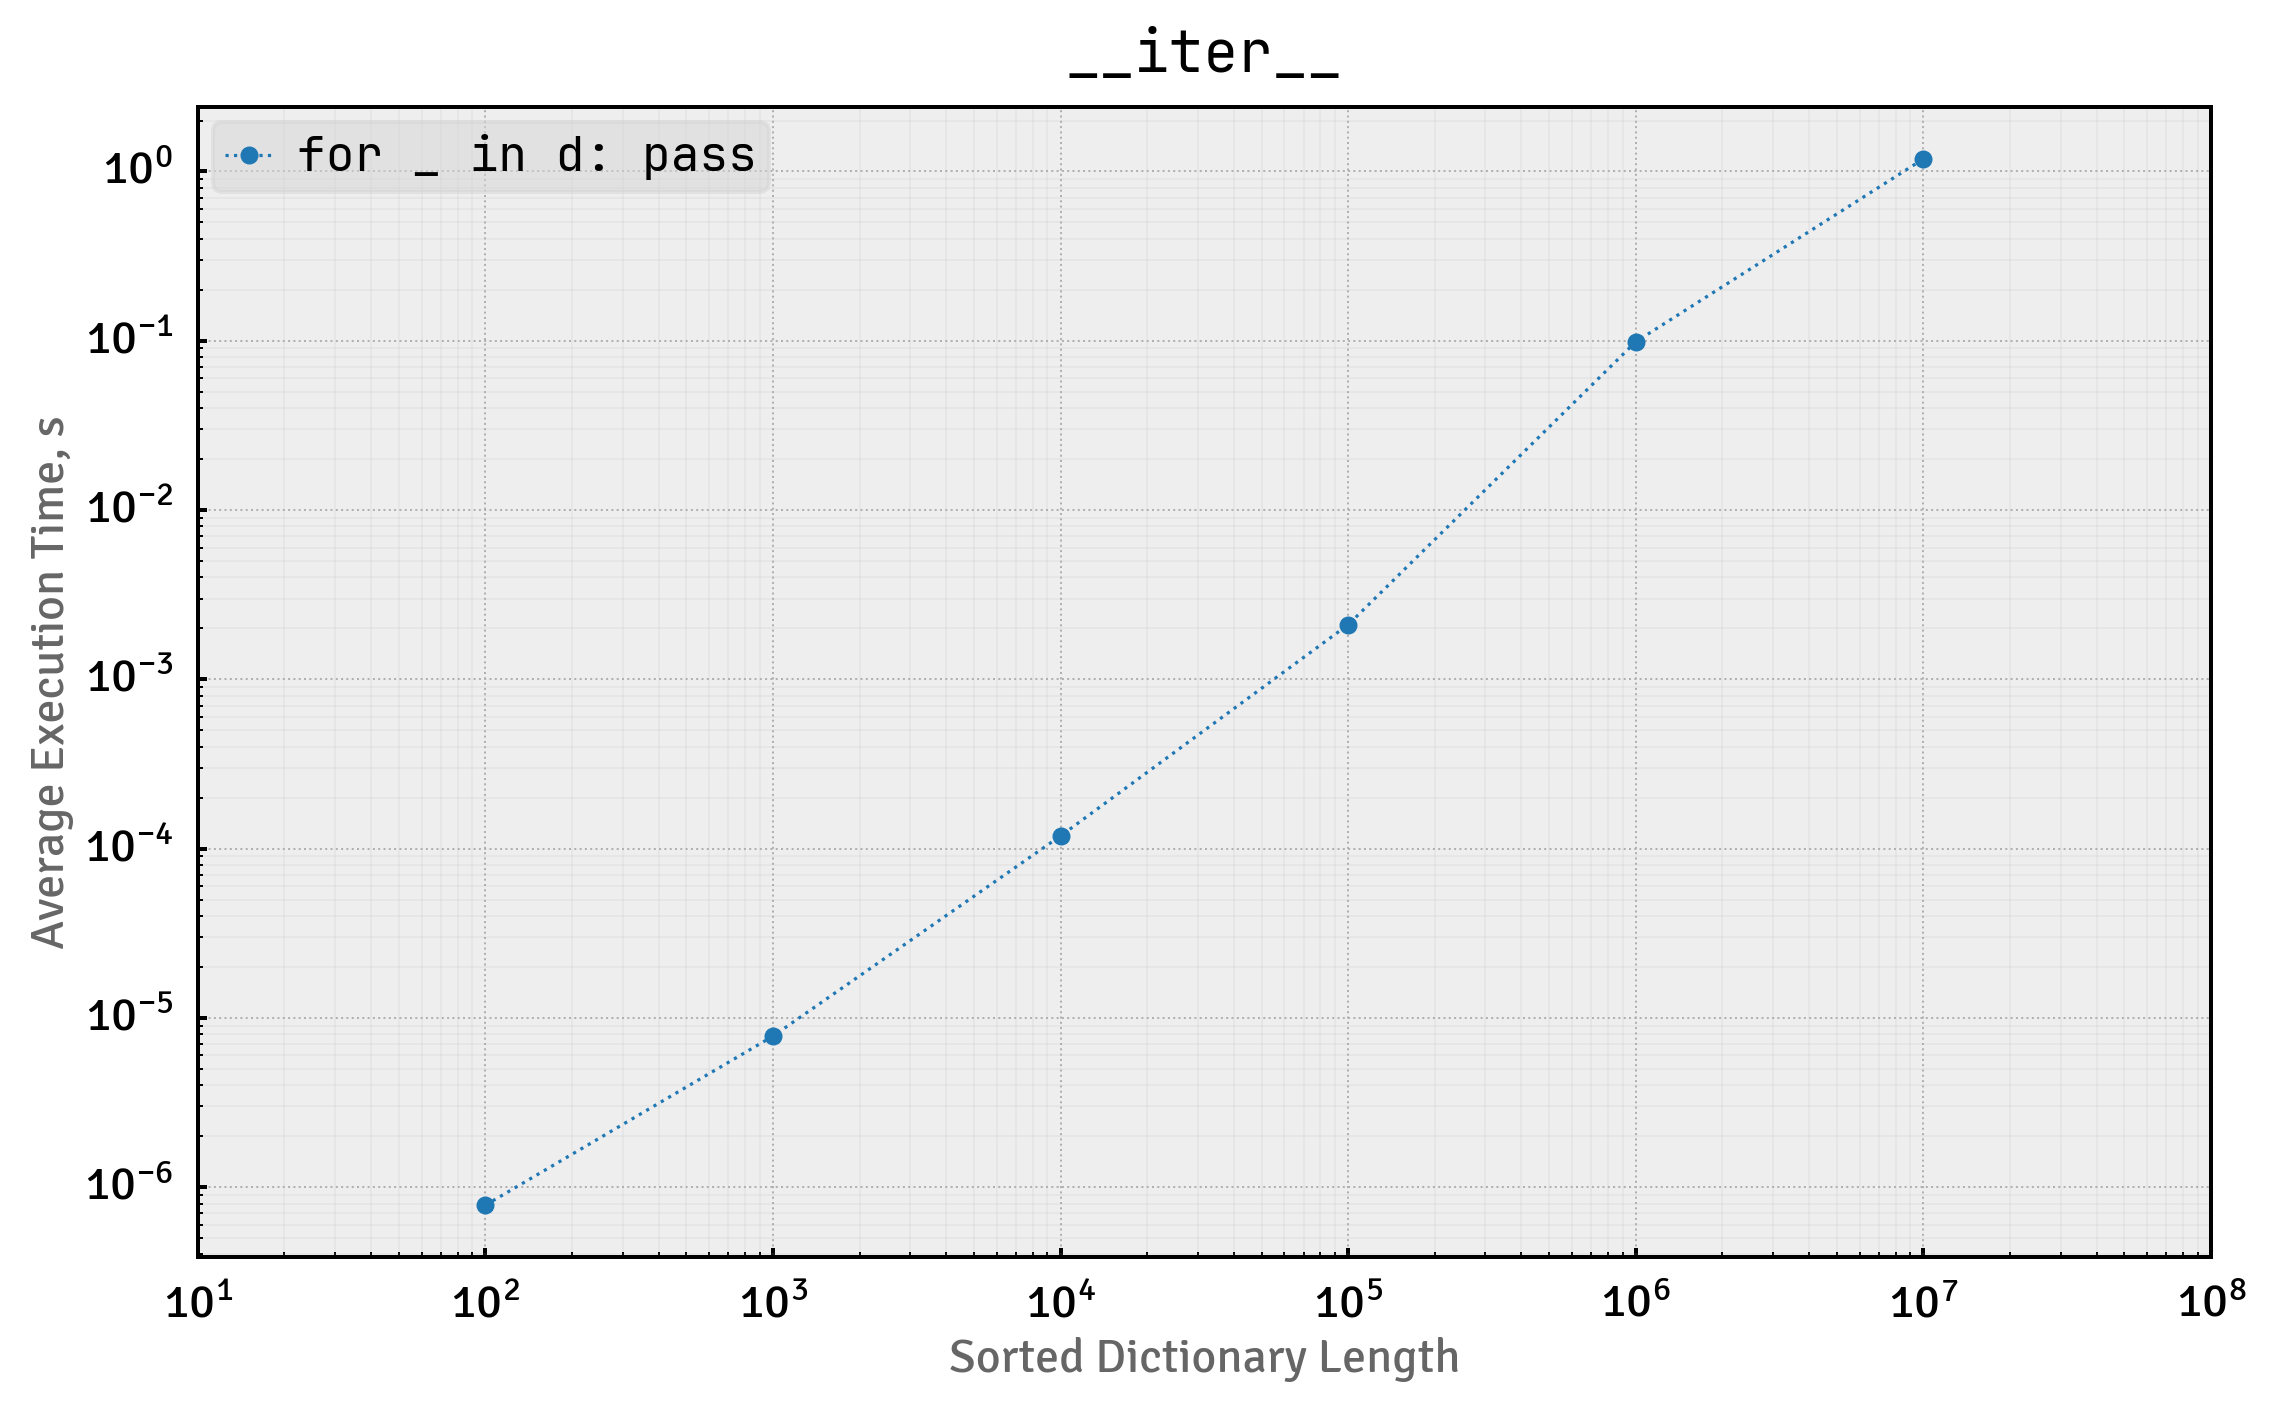

In [63]:
plot(df, logy=True, title="__iter__")